# HW2 Problem 2: Temperature Calculation

Calculate T(0.5,0.25) + T(0.75,0.5) - T1 using the analytical solution from HW2_p1_(a).


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters (from HW2_p1_(a))
L = 1.0         # Plate length (m)
W = 1.0         # Plate width (m)
k = 10.0        # Thermal conductivity (W/(m·K))
q_s_prime = 2000.0  # Heat flux (W/m^2)
T1 = 30.0       # Constant boundary temperature (°C)

print("Physical parameters:")
print(f"L = {L} m")
print(f"W = {W} m")
print(f"k = {k} W/(m·K)")
print(f"q_s_prime = {q_s_prime} W/m^2")
print(f"T1 = {T1} °C")


Physical parameters:
L = 1.0 m
W = 1.0 m
k = 10.0 W/(m·K)
q_s_prime = 2000.0 W/m^2
T1 = 30.0 °C


In [32]:
def T_analytical(x, y, N_terms=50):
    """
    Analytical solution for steady-state temperature distribution
    in a 2D plate with mixed boundary conditions.
    
    Parameters:
    x, y: coordinates (can be arrays)
    N_terms: number of terms in the series (default 50)
    
    Returns:
    Temperature at given coordinates
    """
    T = np.full_like(x, T1)
    C = (4 * q_s_prime) / (k * np.pi**2)
    
    for n_odd in range(1, 2 * N_terms + 1, 2):
        n_pi = n_odd * np.pi
        term = (np.sin(n_pi * x) * np.sinh(n_pi * y)) / \
               (n_odd**2 * np.cosh(n_pi))
        T += C * term
    
    return T

print("T_analytical function defined successfully.")


T_analytical function defined successfully.


In [33]:
# Calculate temperatures at specified points
x1, y1 = 0.5, 0.25
x2, y2 = 0.25, 0.5

T1_point = T_analytical(x1, y1)
T2_point = T_analytical(x2, y2)

print(f"Temperature at (0.5, 0.25): T1 = {T1_point:.6f} °C")
print(f"Temperature at (0.75, 0.5): T2 = {T2_point:.6f} °C")
print(f"Boundary temperature T1: {T1} °C")


Temperature at (0.5, 0.25): T1 = 36.066623 °C
Temperature at (0.75, 0.5): T2 = 41.434970 °C
Boundary temperature T1: 30.0 °C


In [34]:
# Calculate the final result: T(0.5,0.25) + T(0.75,0.5) - T1
result = T1_point + T2_point - T1

print("\n" + "="*50)
print("FINAL RESULT")
print("="*50)
print(f"T(0.5, 0.25) + T(0.25, 0.5) - T1 = {result:.6f} °C")
print("="*50)



FINAL RESULT
T(0.5, 0.25) + T(0.25, 0.5) - T1 = 47.501593 °C


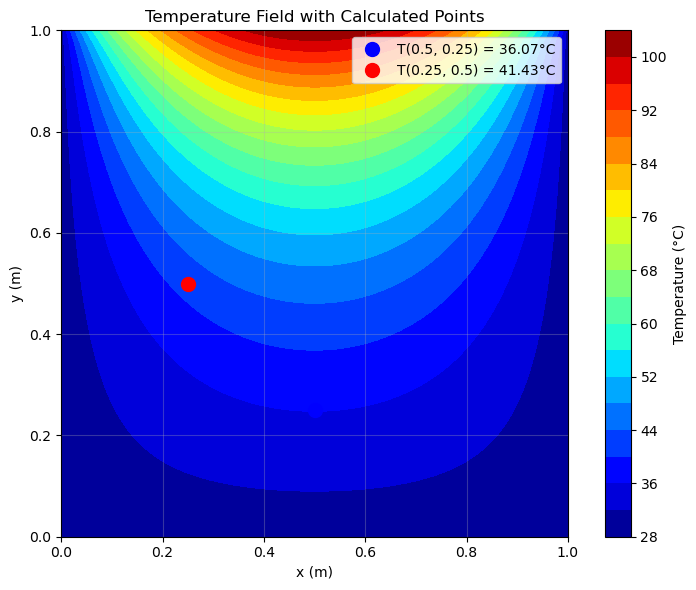

In [35]:
# Optional: Create a visualization showing the calculated points
fig, ax = plt.subplots(figsize=(8, 6))

# Create a grid for visualization
x_grid = np.linspace(0, L, 100)
y_grid = np.linspace(0, W, 100)
X, Y = np.meshgrid(x_grid, y_grid)
T_grid = T_analytical(X, Y)

# Plot temperature field
contour = ax.contourf(X, Y, T_grid, levels=20, cmap='jet')
plt.colorbar(contour, label='Temperature (°C)')

# Mark the calculated points
ax.plot(x1, y1, 'bo', markersize=10, label=f'T({x1}, {y1}) = {T1_point:.2f}°C')
ax.plot(x2, y2, 'ro', markersize=10, label=f'T({x2}, {y2}) = {T2_point:.2f}°C')

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Temperature Field with Calculated Points')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()
